$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/dana.gershon/.cache/torch/hub/ultralytics_yolov5_master


YOLOv5 🚀 2024-7-26 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080, 7974MiB)



Fusing layers... 


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs


Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


image 1/1: 183x275 2 persons, 1 surfboard
Speed: 3.3ms pre-process, 18.3ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


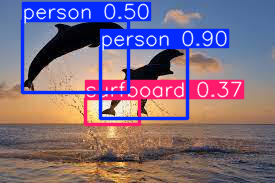

image 1/1: 750x750 2 cats, 1 dog
Speed: 4.4ms pre-process, 19.0ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)


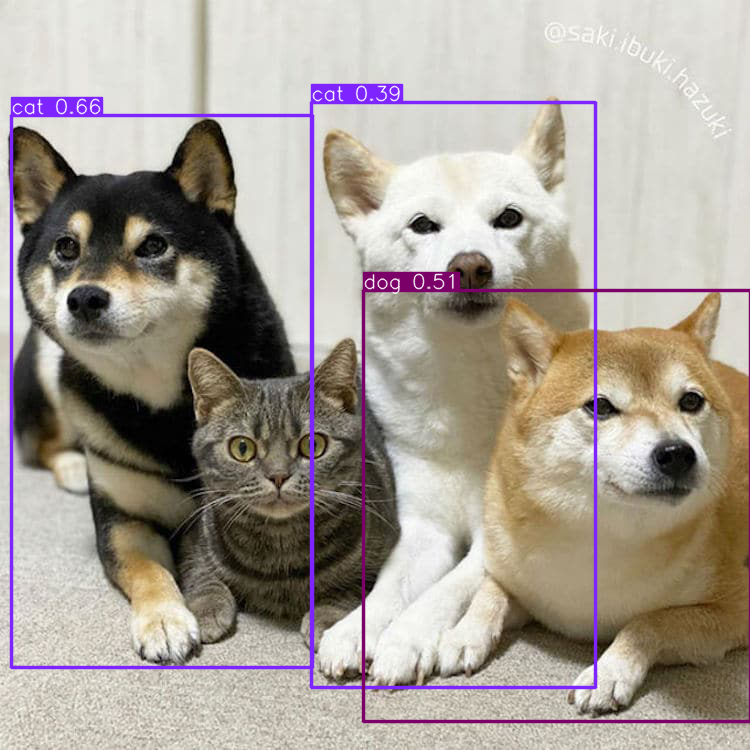

In [2]:
import cv2

def run_inference(model, img):
    # convert image from BGR to RGB to ensure colors are correct
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # run model inference on image
    results = model(img)
    # print inference text result
    results.print()
    # print image with bounding boxes
    results.show()

#Insert the inference code here.
with torch.no_grad():
    for img_path in [img1, img2]:
        # load image from file
        img = cv2.imread(img_path)  
        run_inference(model, img)

### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [3]:
import hw2.answers    
from cs236781.answers import display_answer

display_answer(hw2.answers.part6_q1)



**Your answer:**

1. The model did not detect the objects in the pictures well. 
 - for 'DolphinsInTheSky' picture, it detected 3 objects' places correctly but failed at classifying them - it classified 2 
of the dolphins as people (one with a semi-high confidence of 0.9 and the other with a low confidence of 0.5) and the other dolphin as 
a surfboard (with a low confidence of 0.37).
- for 'cat-shiba-inu-2' picture, it detected 3 objects places correctly (the dogs) but it classified 2 of the dogs as cats
and one as a dog (with low confidences of 0.66, 0.39, 0.51). The detected shape of the dog that was classfied
correctly was too big. Also, it missed detecting the cat as an object.

2. First, the model failures are reflected by the low confidence scores - the model was uncertain in classifying the objects.
Specific reasons for the model failures can be:
- the model has not trained on enough dolphins/dogs/cats examples.
To resolve this issue, we need to train the model on more examples of dolphins/dogs/cats with 
a good balance between examples of different classes. 
- the objects' features in the picture were not strong. For example, the dolphins were filmed with a backlight and became black.
To resolve this issue, we should apply adjustments to the picture such as color correcting and scaling. 
- the objects in the picture have a similar appearance. For example, shiba inu dogs look similar to cats.
to resolve this issue, we need to train the model on diverse examples of dolphins/dogs/cats - different
appearances, lighting, background etc.

3. To conduct a PGD attack, I would take a sample image and iteratively modify it to maximize the model's prediction error.
Similarly to the attack from tutorial 4, this is done by computing the gradient of a negative loss with respect to the sample
(negating effectively turns the optimization problem into maximizing the loss) 
then updating the image in the direction of the gradient, and then projecting to ensure it remains 
within a specified norm. The iterative updates create an adversarial example that causes the model 
to misclassify objects or miss detections.


## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

image 1/1: 408x612 (no detections)
Speed: 1.9ms pre-process, 12.1ms inference, 0.4ms NMS per image at shape (1, 3, 448, 640)


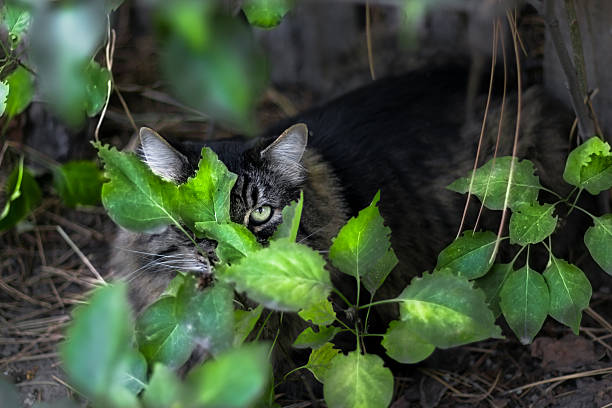

image 1/1: 360x540 1 bird
Speed: 2.3ms pre-process, 11.6ms inference, 1.4ms NMS per image at shape (1, 3, 448, 640)


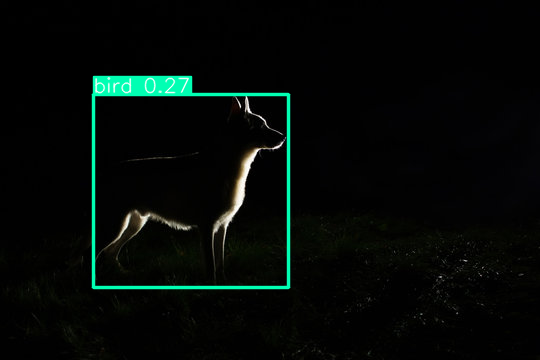

image 1/1: 225x400 2 cars
Speed: 1.8ms pre-process, 18.1ms inference, 1.3ms NMS per image at shape (1, 3, 384, 640)


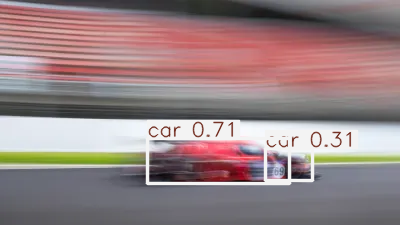

In [4]:
#Insert the inference code here.

occluded_img = 'imgs/cat_behind_leaves.jpg'
low_light_img = 'imgs/dog_at_night.jpg'
blurred_img = 'imgs/speeding_car.jpg'

with torch.no_grad():
    for img_path in [occluded_img, low_light_img, blurred_img]:
        # load image from file
        img = cv2.imread(img_path)  
        run_inference(model, img)

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [5]:
display_answer(hw2.answers.part6_q3)



**Your answer:**

The model did not detect the objects in the pictures well.

- 'cat_behind_leaves': demonstrates occlusion. The leaves block part of the cat's face, hiding cat features crucial 
for the model to detect a cat. The model did not detect any object in the picture.
- 'dog_at_night': demonstrates illumination conditions. This image is taken at night with low light. The model detected the object's position correctly
but classified the dog as a bird with low confidence (0.27). In the low light only part of the shape of the dog is
visible, making it difficult for the model to detect dog features.
- 'speeding_car': demonstrates blurring. This is a blurred image of a speeding racing car. The model detected 2 objects in the area of the car.
The larger object includes most of the car body, and it was classified as a car with low confidence (0.71). The smaller
object includes the front of the car, and was classified as a car with low confidence (0.31). The double detection
of a car is probably because the blurring deformed the shape and boundries of the car.



## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [6]:
#insert bonus code here

In [7]:
display_answer(hw2.answers.part6_bonus)



**Your answer:**

